In [1]:
#1. tensorflow 모듈 설치
# conda install tensorflow
import tensorflow as tf


In [4]:
#2. Hello World 출력
# 상수 하나 생성(상수 Node 생성)
# tensorflow node는 숫자 연산과 데이터 입출력을 담당하는 기능
# session을 이용해서 node를 실행시켜야 node가 가지고 있는 데이터 출력가능
my_node = tf.constant("Hello World") #상수생성

sess = tf.Session()

print(sess.run(my_node)) # Session을 이용하여 node실행, 바이너리 문자열 리턴
print(sess.run(my_node).decode())

b'Hello World'
Hello World


In [ ]:
# TransorFlow : google이 만든 machine library
# open source library
# 수학적 계산을 하기 위한 library
# data flow graph를 이용

# data flow graph는 Node와 Edge로 구성된 방향성 있는 graph
# Node : 데이터의 입출력과 수학적 연산 담당
# Edge :  Tansor를 Node로 실어 나르는 역할 (Node와 Node가 연결되어 있는선)
# Tansor : 동적 크기의 다차원 배열을 지칭(데이터)


In [9]:
import tensorflow as tf

node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)

node3 = node1 + node2 #node1, node2 실행후 node3실행함
#그래프를 실행시키기 위해 runner역할을 하는 Session객체가 있어야 함
sess = tf.Session()

print(sess.run(node3))
print(sess.run([node1,node2]))


30.0
[10.0, 20.0]


In [10]:
import tensorflow as tf
#placeholder를 이용
#2개의 수를 입력으로 받아서 더하는 프로그램
node1 = tf.placeholder(dtype=tf.float32) #입력파라메터를 받아들이기 위한 변수
node2 = tf.placeholder(dtype=tf.float32)

node3 = node1 + node2

sess = tf.Session()
result = sess.run(node3, feed_dict={node1:10,node2:20})
print(result)

30.0


In [12]:
import tensorflow as tf

node1 = tf.constant([10,20,30], dtype=tf.int32)
print(node1) #정보출력, 그래프 실행x
node2 = tf.cast(node1,dtype=tf.float32)
print(node2)


Tensor("Const_14:0", shape=(3,), dtype=int32)
Tensor("Cast:0", shape=(3,), dtype=float32)


In [30]:
# Supervised Learning >
# Linear regression 학습 
import tensorflow as tf
#1. training data set (학습데이터 필요)
x = [1,2,3]
y = [1,2,3] #label

# 선형회귀(linear regression)
# 목표는 가설의 완성
# 가설(hypothesis) = Wx + b
# W와 b를 정의
# Weight & bias 정의
W = tf.Variable(tf.random_normal([1]), name="weight") #표준정규의 랜덤값 추출, 1차원 1개 생성
b =  tf.Variable(tf.random_normal([1]), name="bias") 

#runner 생성
sess = tf.Session()

#global variable의 초기화
sess.run(tf.global_variables_initializer())

print(sess.run(cost))
print("="*30)

# Hypothesis(가설)
# 우리의 최종 목적은 training data에 가장 근접한 Hypothesis를 만드는 것
# (W와b를 결정)
# =>잘만들어진 가설은 W가 1에 가깝고 b가 0에 가까워야 함
H = W * x + b #결과값 node

#cost(loss) function :비용함수
#목적은 cost 함수를 최소로 만드는 W와 b를 구하는 것
#reduce_mean :평균값 구함
#square : 제곱
cost = tf.reduce_mean(tf.square(H-y))

# cost function minimize :비용 최소값 구하기
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost) 

# #runner 생성
# sess = tf.Session()

# #global variable의 초기화
# sess.run(tf.global_variables_initializer())

print(sess.run(cost))
print("="*30)

#학습진행
for step in range(3000):
    #기존 비용보다 낮은 값을 알아내기 위해 반복적으로 수행해서 근사값을 추출
    # _ : 변수 값을 담지 않을때
    _, w_val, b_val, const_val = sess.run([train,W,b,cost])
    if step % 300 == 0:
        print("W:{},b:{},const:{}".format(w_val,b_val,const_val))


17.82936
W:[-1.1440148],b:[0.9558616],const:17.82935905456543
W:[0.6600023],b:[0.7728948],const:0.08610943704843521
W:[0.83484375],b:[0.37543887],const:0.020318349823355675
W:[0.9197743],b:[0.1823719],const:0.004794304724782705
W:[0.96102977],b:[0.08858842],const:0.0011312647257000208
W:[0.98107004],b:[0.04303227],const:0.00026693157269619405
W:[0.9908047],b:[0.02090327],const:6.298516382230446e-05
W:[0.99553335],b:[0.01015375],const:1.4861351701256353e-05
W:[0.99783033],b:[0.00493227],const:3.5068633224000223e-06
W:[0.99894595],b:[0.00239606],const:8.274716378764424e-07


In [9]:
#tensorflow 그래프 생성(node 구성)
import tensorflow as tf
#1. training data set (학습데이터 준비)
#Supervised Learning y쪽 lable이 있다
x = tf.placeholder(dtype=tf.float32) #dtype :받아들이는 데이터 타입, 실수값으로 지정
y = tf.placeholder(dtype=tf.float32)

x_data = [1,2,3,4]
y_data = [4,7,10,13]

#Weight & bias 초기값 생성
#값이 계속 변해야 하기때문에 Variable 변수로 생성
#random_normal() 실수형 난수값 생성
#W:기울기, b:절편
W = tf.Variable(tf.random_normal([1]),name="weight")                                     
b = tf.Variable(tf.random_normal([1]),name="bias")

#가설생성 (목표: 완성된 가설) - W, b값
#hypothesis 생성
H = W * x + b 

#cost(loss) function
#squre 제곱을 한 이유=>2차함수 형태로 생성
cost = tf.reduce_mean(tf.square(H-y))

#cost function을 최소화 시키기 위한 작업
#GradientDescent(알고리즘):경사하강법, 미분한 기울기값을 이용해 최소값을 빨리찾는 방법
#learning_rate :데이터마다 다를수 있음, 이동에 대한(경사가 급한 곳) 간격
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost) #경사가 급한곳을 찾기위해 반복실행

#session & 초기화 -그래프 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습 (반복 학습 수치가 높을 수록 정확도가 높아짐)
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={x:x_data, y:y_data})
    
    if step % 300 == 0:
        print(cost_val)

#prediction -예측값 추출
# feed_dict 값 할당시 데이터 타입 동일하게 정의
sess.run(H, feed_dict={x: [300]}) #x값 300일때 y 예측값 추출


9.443945
0.0067154057
0.0011111102
0.00018384188
3.0419495e-05
5.0347116e-06
8.344026e-07
1.387789e-07
2.3080986e-08
3.800224e-09


array([901.0065], dtype=float32)

In [13]:
# 오존 예측 실습
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt

warnings.filterwarnings(action="ignore")


In [15]:
#panda를 이용해서 파일 읽기
df = pd.read_csv("./data/ozone/ozone.csv", sep=",")
display(df.head())

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [16]:
#온도에 따른 오존량 추측
#Solar.R:태양,Wind:바람,Temp:온도

#필요한 컬럼만 추출
df2 = df[["Ozone","Temp"]]
# 결치값을 처리(제거)
df3 = df2.dropna(how="any", inplace=False) #inplace=False 복사본생성
print(df2.shape)
print(df3.shape)

(153, 2)
(116, 2)


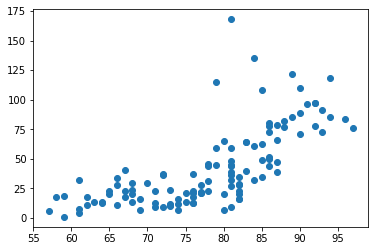

In [17]:
#준비한 데이터가 linear한 데이터인지 확인
#scatter 데이터의 흩어진 정도 확인, y축:오존 x축:온도(화씨)
plt.scatter(df3["Temp"],df3["Ozone"]) #scatter(x데이터,y데이터)
plt.show()

#튀는 데이터 제거 필요


In [23]:
#데이터간의 차이값이 클 경우 정규화 과정을 거친 후 학습시켜야함
#Ozone, Temp값을  0과 1사이의 값으로 변경해야함(정제)

#normalization (정규화) : (요소값 - 최소값) / (최대값 - 최소값)
#                        데이터를 공식에 의해서 0과 1사이의 값으로 변경
#standardization (표준화) : (요소값 - 평균) / 표준편차
#                          음수값 나올수 있음


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66


In [30]:
#placeholder 생성
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)


#training data set
#데이터 정제
# x_data = df3["Temp"] #serise 리턴
# y_data = df3["Ozone"]
x_data = (df3["Temp"] - df3["Temp"].min()) /(df3["Temp"].max()-df3["Temp"].min())
y_data = (df3["Ozone"] - df3["Ozone"].min()) /(df3["Ozone"].max()-df3["Ozone"].min())


# Weight & bias
W = tf.Variable(tf.random_normal([1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")

#Hypothesis
H = W * x + b

#cost function
cost = tf.reduce_mean(tf.square(H - y))

#최소화 노드 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

#session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습(train)
#cost 값의 최소값은 0 (제곱값이기 때문에)
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict={x:x_data, y:y_data})

    if step % 300 == 0:
        print("cost :{}".format(cost_val))

cost :0.44602230191230774
cost :0.020128455013036728
cost :0.019818495959043503
cost :0.019816836342215538
cost :0.019816827028989792
cost :0.01981682889163494
cost :0.019816827028989792
cost :0.019816827028989792
cost :0.019816827028989792
cost :0.019816827028989792


In [55]:
#Multi-variable(multiple) linear regression
import tensorflow as tf

#training data set
x_data = [[73,80,75],
          [93,88,93],
          [89,91,90],
          [96,89,100],
          [73,66,70]]
y_data = [[152],
          [185],
          [180],
          [196],
          [142]]

#placeholder 생성
#Matrix 형태, shape 정의해줘야함
#행의 개수가 변경될 수 있기때문에 None 정의
X = tf.placeholder(shape=[None,3] ,dtype=tf.float32) 
Y = tf.placeholder(shape=[None,1] ,dtype=tf.float32)

#Weight & bias
#X와 W 행열 곱이 이뤄져야 하기 때문에 3행 1열
W = tf.Variable(tf.random_normal([3,1]), name="weight") 
b = tf.Variable(tf.random_normal([1]), name="bias") 

#Hypothesis
#행열곱 연산, X가 먼저와야함
H = tf.matmul(X,W) + b 

#Cost function
cost = tf.reduce_mean(tf.square(H - Y))

#학습노드 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

display(x_data)
#학습(train)
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})

    if step % 300 == 0:
        print("cost :{}".format(cost_val))

        

[[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 89, 100], [73, 66, 70]]

cost :69922.6640625
cost :nan
cost :nan
cost :nan
cost :nan
cost :nan
cost :nan
cost :nan
cost :nan
cost :nan


In [33]:
#온도에 따른 오존량 추측 과제
#x축: Solar.R 태양,Wind:바람,Temp:온도
#y축: Ozone 오존
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./data/ozone/ozone.csv", sep=",")


In [102]:
df2 = df[["Solar.R","Wind","Temp","Ozone"]]
df2.dropna(how="any", inplace=True)

x_data = df2[["Solar.R","Wind","Temp"]]
y_data = df2[["Ozone"]]

#normalization (정규화) : (요소값 - 최소값) / (최대값 - 최소값)
x_data_set = pd.DataFrame([])
x_data_set["Solar"]= (x_data["Solar.R"]-x_data["Solar.R"].min())/(x_data["Solar.R"].max()-x_data["Solar.R"].min())
x_data_set["Wind"]= (x_data["Wind"]-x_data["Wind"].min())/(x_data["Wind"].max()-x_data["Wind"].min())
x_data_set["Temp"]= (x_data["Temp"]-x_data["Temp"].min())/(x_data["Temp"].max()-x_data["Temp"].min())

y_data_set = pd.DataFrame([])
y_data_set["Ozone"]= (y_data["Ozone"]-y_data["Ozone"].min())/(y_data["Ozone"].max()-y_data["Ozone"].min())

print(x_data_set.shape)
print(y_data_set.shape)

X = tf.placeholder(shape=[None,3] ,dtype=tf.float32) 
Y = tf.placeholder(shape=[None,1] ,dtype=tf.float32)

W = tf.Variable(tf.random_normal([3,1]), name="weight") 
b = tf.Variable(tf.random_normal([1]), name="bias") 

H = tf.matmul(X,W) + b 

cost = tf.reduce_mean(tf.square(H - Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data_set.values, Y:y_data_set.values})

    if step % 3000 == 0:
        print("cost :{}".format(cost_val))

#prediction 예측값, X - shape 맞춰서 값 할당
print("="*30)
print(sess.run(H,feed_dict={X:[[190,7.4,67]]}))

(111, 3)
(111, 1)
cost :1.549900770187378
cost :0.016697591170668602
cost :0.01568683609366417
cost :0.015534189529716969
cost :0.015510670840740204
cost :0.015507045201957226
cost :0.015506485477089882
cost :0.015506401658058167
cost :0.015506387688219547
cost :0.015506385825574398
[[46.181705]]


In [101]:
#온도에 따른 오존량 추측 - 강사님 풀이
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Data Loading
df = pd.read_csv("./data/ozone/ozone.csv", sep=",")
#필요한 컬럼만 추출
df.drop(["Month","Day"],axis=1,inplace=True) #axisis=1 열방향 삭제
#결측값 제거
df.dropna(how="any", inplace=True)
#x 데이터 추출
df_x = df.drop("Ozone", axis=1, inplace=False)
df_y = df["Ozone"]

#training data set
x_data = MinMaxScaler().fit_transform(df_x.values)
y_data = MinMaxScaler().fit_transform(df_y.values.reshape(-1,1))

#placeholder
X = tf.placeholder(shape=[None,3] ,dtype=tf.float32) 
Y = tf.placeholder(shape=[None,1] ,dtype=tf.float32)

#Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight") 
b = tf.Variable(tf.random_normal([1]), name="bias") 

#Hypothesis 
H = tf.matmul(X,W) + b  #행열곱

#Cost function
cost = tf.reduce_mean(tf.square(H - Y))

#train node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습(train)
for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})

    if step % 3000 == 0:
        print("cost :{}".format(cost_val))
        
#prediction 예측값, X - shape 맞춰서 값 할당
print("="*30)
print(sess.run(H,feed_dict={X:[[190,7.4,67]]}))

cost :0.5548840165138245
cost :0.022844256833195686
cost :0.016599806025624275
cost :0.015674831345677376
cost :0.015532346442341805
cost :0.015510386787354946
cost :0.015507001429796219
cost :0.015506479889154434
cost :0.015506399795413017
cost :0.015506387688219547
[[46.18493]]


0.23294933
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
[0.50340176]


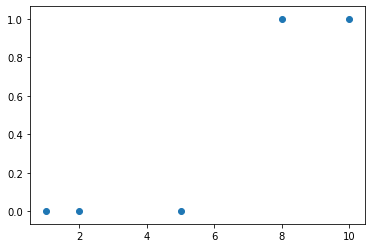

In [57]:
import tensorflow as tf
import matplotlib.pyplot as plt #그래프 그릴때 사용
import warnings

warnings.filterwarnings(action="ignore")

#training data set
x_data = [1,2,5,8,10]
y_data = [0,0,0,1,1]

#placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

#Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight") 
b = tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis(스칼라 연산)
H = W * x + b

#cost function 
cost = tf.reduce_mean(tf.square(H-y))

#cost -2차함수 -> 미분이용 -> 최소값 찾기
#train node생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습과정 진행
for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={x:x_data,y:y_data})
    if(step % 3000 == 0):
        print(cost_val)

#prediction
print(sess.run(H, feed_dict = {x:[6]}))

#plot
plt.scatter(x_data,y_data)
plt.show()

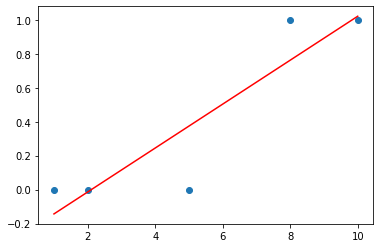

In [58]:
#plot
plt.scatter(x_data,y_data)
plt.plot(x_data,x_data * sess.run(W) + sess.run(b),"r")
plt.show()

In [16]:
#Sigmoid function 예제

import tensorflow as tf
import matplotlib.pyplot as plt #그래프 그릴때 사용
import warnings

warnings.filterwarnings(action="ignore")

#training data set
x_data = [[30,0],
         [10,0],
         [8,1],
         [3,3],
         [2,3],
         [5,1],
         [2,0],
         [1,0]]
y_data = [[1],[1],[1],[1],[1],[0],[0],[0]]

#placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

#Weight & bias
W = tf.Variable(tf.random_normal([2,1]),name="weight") #행열곱한 값 :[2,1]
b = tf.Variable(tf.random_normal([1]),name="bias") 

#Hypothesis
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits) #sigmoid - 직선을 곡선 형태로 변경

#cost function
#sigmoid_cross_entropy_with_logits -GradientDescent 사용가능하게 변경
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

#training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습과정 진행
for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data})
    if(step % 3000 == 0):
        print(cost_val)

#Accuracy (정확도 측정)
#97~98%정도 나와줘야함
#boolean값을 실수로 변경
#H > 0.5 크면 1로 지정
predict = tf.cast(H > 0.5, dtype=tf.float32) #예측값
correct = tf.equal(predict, Y) #예측값과 실제값이 같으면 1(True)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32)) #정확도 측정
print("정확도:{}".format(sess.run(accuracy,
                              feed_dict={X:x_data,Y:y_data})))
#정확도:1.0 => 100%
#(최소값 0, 최대값 1)
#=>정확도 측정은 평가 데이터(Test)로 평가해야함
#가지고 있는 학습데이터셋을 7:3으로 나눠서 학습과 평가를 해야함

#prediction
print(sess.run(H, feed_dict = {X:[[4,2]]}))

0.82916594
0.2437433
0.20162462
0.17942974
0.16430375
0.15266247
0.1430897
0.13490167
0.12772118
0.12131847
정확도:1.0
[[0.8150163]]


In [56]:
#실습 - 점수에 따른 대학원 입학여부 추측
#./data/admission/admission.csv 대학원 입학여부 데이터
#admit :입학여부 (1:입학 0:입학불가), gre, gpa, rank :등급
# 7:3으로 데이터 나눠서 테스트(7: 학습용,3: 테스트용으로 사용)
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#data loading
df = pd.read_csv("./data/admission/admission.csv",sep=",")
df.dropna(how="any", inplace=True) 

step_cnt = int(df.shape[0] * 0.7)
df_x = df.loc[:step_cnt,["gre","gpa","rank"]]
df_y = df.loc[:step_cnt,["admit"]]

#training data set
x_data = MinMaxScaler().fit_transform(df_x.values)
y_data = MinMaxScaler().fit_transform(df_y.values.reshape(-1,1))

#placeholder
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

#Weight & bias
W = tf.Variable(tf.random_normal([3,1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")
#Hypothesis
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits) #sigmoid - 직선을 곡선 형태로 변경

#cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

#training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습과정 진행
for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data})
    if(step % 3000 == 0):
        print(cost_val)

#Accuracy (정확도 측정)
df_x = df.loc[step_cnt:,["gre","gpa","rank"]]
df_y = df.loc[step_cnt:,["admit"]]

x_data_t = MinMaxScaler().fit_transform(df_x.values)
y_data_t = MinMaxScaler().fit_transform(df_y.values.reshape(-1,1))

predict = tf.cast(H > 0.5, dtype=tf.float32) #예측값
correct = tf.equal(predict, Y) #예측값과 실제값이 같으면 1(True)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32)) #정확도 측정
print("정확도:{}".format(sess.run(accuracy,
                              feed_dict={X:x_data_t,Y:y_data_t})))


1.4476365
0.6157297
0.58782804
0.5735749
0.5653397
0.5602514
0.55699354
0.5548664
0.5534611
0.5525258
정확도:0.699999988079071


In [65]:
# 실습 - 타이타닉 구조 현황 데이터 학습,평가
#./data/titanic/train.csv
#PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
#PassengerId 탑승자id,Survived 구조여부 (1 구조 0 구조못함)
#Pclass 좌석등급, Name 이름, Sex 성별, Age 나이,SibSp 형제수,Parch 부모/자식수,
#Ticket 티켓번호,Fare 요금, Cabin 객실, Embarked 탑승한 곳
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#data loading
df = pd.read_csv("./data/titanic/train.csv",sep=",")

display(df.loc[:20,:])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [77]:
df2 = df[["Pclass","Sex","Age","Fare","Survived"]]
df2.dropna(how="any", inplace=True)

df_x = df2[["Pclass","Sex","Age","Fare"]]
df_y = df2[["Survived"]]
#print(df_x.shape)
#print(df_y.shape)
df_x["Sex"] = df2['Sex'].apply(lambda x: '1' if x == 'male' else '2')
df_x["Age"] = df2['Age'].apply(lambda x: '1' if x == 'male' else '2')
df_x

(714, 4)
(714, 1)


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500
6,1,1,54.0,51.8625
7,3,1,2.0,21.0750
8,3,2,27.0,11.1333
9,2,2,14.0,30.0708
10,3,2,4.0,16.7000


In [78]:
#Multinomial Classification
import tensorflow as tf

# training data set
#7행4열
x_data = [[10,7,8,5],
         [8,8,9,4],
         [7,8,2,3],
         [6,3,9,3],
         [7,5,7,4],
         [3,5,6,2],
         [2,4,3,1]]
#ON-HOT Encoding 변환해야함(문자->숫자)
#A=>[1,0,0], B=>[0,1,0], C=>[0,0,1]
y_data = [[1,0,0],
         [1,0,0],
         [0,1,0],
         [0,1,0],
         [0,1,0],
         [0,0,1],
         [0,0,1],
         ] 
#placeholder
X = tf.placeholder(shape=[None,4],dtype=tf.float32)
Y = tf.placeholder(shape=[None,3],dtype=tf.float32)

#Weight & bias
W = tf.Variable(tf.random_normal([4,3]),name="weight")
b = tf.Variable(tf.random_normal([3]),name="bias")

#Hypothesis
logits = tf.matmul(X,W) + b
H = tf.nn.softmax(logits) #데이터를 확율값으로 변환해줌

#cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# 이하 학습까지 동일코드
#training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습과정 진행
for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data})
    if(step % 3000 == 0):
        print(cost_val)
        
#Accuracy 정확도 측정

#prediction 예측


17.180317
0.3168239
0.23893155
0.19034712
0.15705183
0.1330058
0.114951134
0.1009694
0.08986449
0.08085648
